In [1]:
import cv2 as cv
import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForCausalLM

from os import listdir

In [2]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

In [3]:
model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-large", torch_dtype=torch_dtype, trust_remote_code=True).to(device)
processor = AutoProcessor.from_pretrained("microsoft/Florence-2-large", trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/48.7k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [22]:
path = "/content/drive/MyDrive/Vision & Language Praktikum/AMBER_Data"
# img = cv.imread(path)

In [20]:
def generateCaption(image, task_prompt, text_input=None) -> dict[str, str]:
    if text_input is None:
        prompt = task_prompt
    else:
        prompt = task_prompt + text_input
    inputs = processor(text=prompt, images=image, return_tensors="pt").to(device, torch_dtype)
    generated_ids = model.generate(
      input_ids=inputs["input_ids"],
      pixel_values=inputs["pixel_values"],
      max_new_tokens=1024,
      num_beams=3
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

    parsed_answer = processor.post_process_generation(generated_text, task=task_prompt, image_size=(image.shape[1], image.shape[0]))

    print(parsed_answer)

    return parsed_answer

In [24]:
prompt = "<MORE_DETAILED_CAPTION>"

# Loop to get captions against each image
for i in listdir(path):
  img = cv.imread()
  answer = generateCaption(img, prompt)
  print("Parsed Answer:", answer)

{'<MORE_DETAILED_CAPTION>': 'The image shows a group of three people walking on a grassy field. The sky is a beautiful orange color, indicating that it is either sunrise or sunset. The field is covered in tall green grass and there are trees and bushes on either side of the path. The people are walking in a line, with the person in the front wearing a yellow t-shirt and shorts, the person behind them wearing a blue shirt and shorts and carrying a backpack. They appear to be walking towards the horizon. The overall mood of the image is peaceful and serene.'}
Parsed Answer: {'<MORE_DETAILED_CAPTION>': 'The image shows a group of three people walking on a grassy field. The sky is a beautiful orange color, indicating that it is either sunrise or sunset. The field is covered in tall green grass and there are trees and bushes on either side of the path. The people are walking in a line, with the person in the front wearing a yellow t-shirt and shorts, the person behind them wearing a blue sh

In [14]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches
# def plot_bbox(image, data):
#    # Create a figure and axes
#     fig, ax = plt.subplots()

#     # Display the image
#     ax.imshow(image)

#     # Plot each bounding box
#     for bbox, label in zip(data['bboxes'], data['labels']):
#         # Unpack the bounding box coordinates
#         x1, y1, x2, y2 = bbox
#         # Create a Rectangle patch
#         rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
#         # Add the rectangle to the Axes
#         ax.add_patch(rect)
#         # Annotate the label
#         plt.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

#     # Remove the axis ticks and labels
#     ax.axis('off')

#     # Show the plot
#     plt.show()

In [9]:
import matplotlib.pyplot as plt

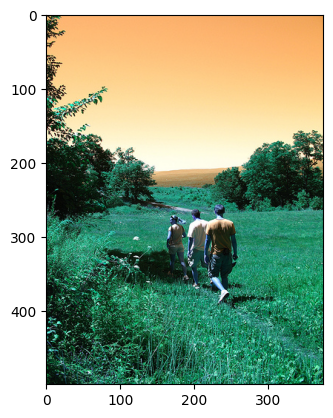

In [10]:
plt.imshow(image)